In [1]:
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
# Dataset Variable Initialization
x_data = []
y_data = []
dataset = []
m = 0 #20

In [3]:
with open('sampledataset.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  dataset_temp = list(csvFile)
  dataset_temp.pop(0)
  dataset = dataset_temp
  m = len(dataset) #20 Dataset

In [4]:
x_data = [int(row[0]) for row in dataset]
y_data = [int(row[1].replace(',', '')) for row in dataset]

In [9]:
print(x_data)
print(y_data)
print(f"num of x data: {len(x_data)}")
print(f"num of y data: {len(y_data)}")

[1625, 2100, 1750, 1300, 2300, 1850, 1400, 1900, 1550, 2000, 1700, 1250, 2250, 1800, 1350, 1950, 1600, 2150, 1750, 1300]
[3250000, 4700000, 3500000, 2700000, 5200000, 3800000, 2900000, 4000000, 3100000, 4500000, 3400000, 2600000, 5000000, 3700000, 2800000, 4100000, 3300000, 4800000, 3500000, 2700000]
num of x data: 20
num of y data: 20


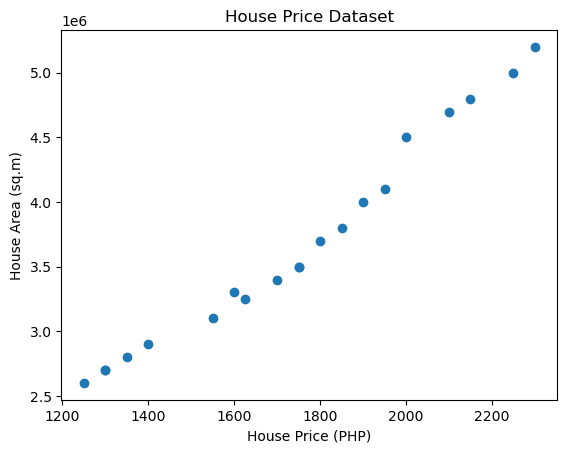

In [11]:
plt.scatter(x_data,y_data)
plt.title("House Price Dataset")
plt.xlabel("House Price (PHP)")
plt.ylabel("House Area (sq.m)")
plt.show()

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)  # Split data

# Training the Linear Regression Model
regr = LinearRegression()  # Create a linear regression model
regr.fit(np.array(x_train).reshape(-1, 1), y_train)  # Reshape x_train for 2D compatibility

# Making Predictions (optional)
y_pred = regr.predict(np.array(x_test).reshape(-1, 1))  # Reshape x_test for predictions
print("Predicted prices for some test samples:", y_pred[:5])  # Print the first 5 predictions

# Model Evaluation (optional)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")  
  # Report the MSE with two decimal places

# Saving the Model (optional)
from joblib import dump

dump(regr, 'house_price_model.pkl')  # Save the model as 'house_price_model.pkl' (change the filename if needed)
print("Model saved successfully!")

Predicted prices for some test samples: [3384772.39353891 4656593.24522761 4172090.06363191 4535467.44982868]
Mean Squared Error (MSE): 17749258178.72
Model saved successfully!
